In [16]:
import pandas as pd

training_data = "C:\\Users\\hugoj\\JupyterProjects\\datasets\\titanic\\train.csv"
test_data = "C:\\Users\\hugoj\\JupyterProjects\\datasets\\titanic\\test.csv"

X_titanic_train_clean = pd.DataFrame.from_csv(training_data)
X_titanic_train = X_titanic_train_clean.copy()

X_titanic_test_clean = pd.DataFrame.from_csv(test_data)
X_titanic_test = X_titanic_test_clean.copy()

In [2]:
# Getting rid of the name data except for the titles. Maybe the title of an individual (ex. Master)
# is somehow connected to the probability of survival 

title_data = X_titanic_train_clean['Name']
encoding = []

for i in range(1, len(title_data) + 1):
    name = str(title_data[i])
    if 'Mr.' in name:
        encoding.append(0)
    elif 'Mrs.' in name:
        encoding.append(1)
    elif 'Miss.' in name:
        encoding.append(2)
    elif 'Master.' in name:
        encoding.append(3)
    else:
        encoding.append(4)

X_titanic_train['Name'] = encoding
X_titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,2,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,0,male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Now we replace sex with a number as well
from sklearn.preprocessing import LabelEncoder

sex_enc = LabelEncoder()
sex = 'Sex'
sex_data = X_titanic_train[sex]
sex_data_encoded = sex_enc.fit_transform(sex_data)

In [4]:
# Now we know that males are represented by 1 and females by 0. Let's replace our current 
# data with this encoding 
X_titanic_train['Sex'] = sex_data_encoded
X_titanic_train.head(n=6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,0,1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,2,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,1,0,35.0,1,0,113803,53.1000,C123,S
5,0,3,0,1,35.0,0,0,373450,8.0500,NaN,S
6,0,3,0,1,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
# Some passengers are missing thier ages. Let's give them a dummy age equal to the average age of all 
# passengers. I don't have a concreate reason to justify why the average should be the dummy value, 
# but it doesn't seem illogical to me so I'll go ahead and do it. 

X_titanic_train['Age'].fillna(X_titanic_train['Age'].median(), inplace=True)
X_titanic_train.head(n=6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,0,1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,2,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,1,0,35.0,1,0,113803,53.1000,C123,S
5,0,3,0,1,35.0,0,0,373450,8.0500,NaN,S
6,0,3,0,1,28.0,0,0,330877,8.4583,NaN,Q


In [6]:
# We must replace the ticket column as well as it is filled with a mixture of pure ticket numbers and 
# ticket numbers with String prefixes. For now, I will choose to replace all ticket numbers with 
# String prefixes with the number 1 and those without prefixes

X_titanic_train['Ticket'].replace(to_replace=['[a-zA-Z]+(\d)*', '(\d)*'], value = [1,0], inplace=True, regex=True)
X_titanic_train.head(n=6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,0,1,22.0,1,0,1,7.2500,NaN,S
2,1,1,1,0,38.0,1,0,1,71.2833,C85,C
3,1,3,2,0,26.0,0,0,1,7.9250,NaN,S
4,1,1,1,0,35.0,1,0,0,53.1000,C123,S
5,0,3,0,1,35.0,0,0,0,8.0500,NaN,S
6,0,3,0,1,28.0,0,0,0,8.4583,NaN,Q


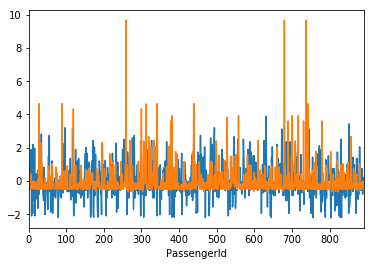

In [8]:
# The fares each passenger paid may vary so we must normalize the column. While we're at it, we should 
# do the same to the age column. 
from sklearn import preprocessing

%matplotlib inline
age_data = X_titanic_train['Age']
fare_data =X_titanic_train['Fare']
preprocessing.scale(age_data, copy=False)
preprocessing.scale(fare_data, copy=False)
age_data.plot()
fare_data.plot()

In [9]:
X_titanic_train.head(n=10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,0,1,-0.565736,1,0,1,-0.502445,NaN,S
2,1,1,1,0,0.663861,1,0,1,0.786845,C85,C
3,1,3,2,0,-0.258337,0,0,1,-0.488854,NaN,S
4,1,1,1,0,0.433312,1,0,0,0.420730,C123,S
5,0,3,0,1,0.433312,0,0,0,-0.486337,NaN,S
6,0,3,0,1,-0.104637,0,0,0,-0.478116,NaN,Q
7,0,1,0,1,1.893459,0,0,0,0.395814,E46,S
8,0,3,3,1,-2.102733,3,1,0,-0.224083,NaN,S
9,1,3,1,0,-0.181487,0,2,0,-0.424256,NaN,S


In [10]:
# For my first model, I will just encode the cabins into a category by String prefix or by none.

X_titanic_train['Cabin'].fillna(0, inplace=True)

X_titanic_train.head(n=10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,0,1,-0.565736,1,0,1,-0.502445,0,S
2,1,1,1,0,0.663861,1,0,1,0.786845,C85,C
3,1,3,2,0,-0.258337,0,0,1,-0.488854,0,S
4,1,1,1,0,0.433312,1,0,0,0.420730,C123,S
5,0,3,0,1,0.433312,0,0,0,-0.486337,0,S
6,0,3,0,1,-0.104637,0,0,0,-0.478116,0,Q
7,0,1,0,1,1.893459,0,0,0,0.395814,E46,S
8,0,3,3,1,-2.102733,3,1,0,-0.224083,0,S
9,1,3,1,0,-0.181487,0,2,0,-0.424256,0,S


In [11]:
X_titanic_train['Cabin'].replace(
    to_replace=['[A](\d)*', '[B](\d)*', '[C](\d)*', '[D](\d)*', '[E](\d)*', '([F]|[F G])(\d)*'], 
    value = [1, 2, 3, 4, 5, 6], inplace=True, regex=True)
X_titanic_train.head(n=10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,0,1,-0.565736,1,0,1,-0.502445,0,S
2,1,1,1,0,0.663861,1,0,1,0.786845,3,C
3,1,3,2,0,-0.258337,0,0,1,-0.488854,0,S
4,1,1,1,0,0.433312,1,0,0,0.420730,3,S
5,0,3,0,1,0.433312,0,0,0,-0.486337,0,S
6,0,3,0,1,-0.104637,0,0,0,-0.478116,0,Q
7,0,1,0,1,1.893459,0,0,0,0.395814,5,S
8,0,3,3,1,-2.102733,3,1,0,-0.224083,0,S
9,1,3,1,0,-0.181487,0,2,0,-0.424256,0,S


In [12]:
# Lastly, we have to replace the Embarked feature with some encoding
X_titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
X_titanic_train['Embarked'].replace(
    to_replace=['S', 'C', 'Q'], 
    value = [0, 1, 2], inplace=True)
X_titanic_train.head(n=10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,0,1,-0.565736,1,0,1,-0.502445,0,0.0
2,1,1,1,0,0.663861,1,0,1,0.786845,3,1.0
3,1,3,2,0,-0.258337,0,0,1,-0.488854,0,0.0
4,1,1,1,0,0.433312,1,0,0,0.420730,3,0.0
5,0,3,0,1,0.433312,0,0,0,-0.486337,0,0.0
6,0,3,0,1,-0.104637,0,0,0,-0.478116,0,2.0
7,0,1,0,1,1.893459,0,0,0,0.395814,5,0.0
8,0,3,3,1,-2.102733,3,1,0,-0.224083,0,0.0
9,1,3,1,0,-0.181487,0,2,0,-0.424256,0,0.0


In [14]:
# Split the training data from the training labels
y_titanic_train = X_titanic_train['Survived']
X_titanic_train = X_titanic_train.drop('Survived', axis=1)